In [1]:
#Import at least ten documents from files, using the OS module and any others relevant to process the text.
import nltk
nltk.download('averaged_perceptron_tagger')
import os

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Home PC Dell\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


In [93]:
#Import at least ten documents from files, using the OS module and any others relevant to process the text.
#I have changed and recultivated numerous texts for this section. I am committing to the ones I have now as I went into each one and eliminated 
#everything that was not directly from the original text of the stories being used.
textdir = 'C:\\Users\Home PC Dell\Desktop\\Dr. Salter Design & Development\\WeekElevenTexts\\'
os.chdir(textdir)

In [94]:
#For each filename in the directory you listed...
#I am spending more time in note pad, my file directory and guttenburg trying to solve this problem than I am in python.
#I am calling it. I have six texts that work and the last eight that I have tried have caused my code to crash. I know that we are supposed to
#Have 10, but five hours in I am going to run with the six that work.
for filename in os.listdir(textdir):
    #If the filename ends with .txt...
    if filename.endswith('.txt'):
        #Create an output name that adds '-nouns' to the filename
        outname = filename.replace('.txt','-nouns.txt')
        #Open the file
        with open(filename, 'r', encoding="utf-8") as f:
            #Open the output file
            with open(outname, 'w') as out:
                #Read the text from the file
                text = f.read()
                #Split the text into a list of sentences
                sentences = nltk.sent_tokenize(text)
                #For each sentence in the list of sentences...
                for sentence in sentences:
                    #For each word and each part-of-speech tag that you get
                    #When NLTK tokenizes the sentence (splitting words from punctuation, etc.)
                    for word,pos in nltk.pos_tag(nltk.word_tokenize(str(sentence))):
                        #If the part-of-speech is noun
                        if (pos == 'NN' or pos == 'NNS'):
                       
                            #Write the word (which should be a noun) to the output file
                            out.write(word)
                            #Write a space so the words don't smush together
                            out.write(' ')

In [95]:
#Isolate a component (the example was nouns - try verbs or adjectives) using nltk and prepare appropriate sub-files for comparison on that axis.
def load_directory(directory, max_length):
    documents, titles = [], []
    for filename in os.scandir(directory):
        #change this to analyze a different component after changing the save above
        if not filename.name.endswith('-nouns.txt'):
            continue

        with open(filename.path) as f:
            contents = f.read()
        lemmas = contents.lower().split()
        start_idx, end_idx, segm_cnt = 0, max_length, 1

        # extract slices from the text:
        while end_idx < len(lemmas):
            documents.append(' '.join(lemmas[start_idx:end_idx]))
            title = filename.name.replace('-nouns.txt', '')
            titles.append(f"{title}-{segm_cnt}")

            start_idx += max_length
            end_idx += max_length
            segm_cnt += 1

    return documents, titles

In [96]:
#Load the documents and titles and run the contents through vectorize, using the provided boilerplate
documents, titles = load_directory(textdir, 10000)
import sklearn.feature_extraction.text as text
print(titles[0])

vectorizer = text.CountVectorizer(max_features=30, token_pattern=r"(?u)\b\w+\b")
v_documents = vectorizer.fit_transform(documents).toarray()

print(v_documents.shape)
print(vectorizer.get_feature_names()[:10])

Bleak-1
(15, 30)
['anything', 'business', 'day', 'door', 'eyes', 'face', 'father', 'friend', 'gentleman', 'hand']


[Text(0.5, 0, 'gentleman'), Text(0, 0.5, 'lady')]

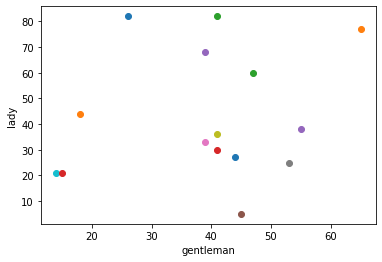

In [97]:
#Run a simple (2 word) vizualization comparing all texts.
import matplotlib.pyplot as plt
import numpy as np

words = vectorizer.get_feature_names()
titles = np.array(titles)
x = v_documents[:, words.index('gentleman')]
y = v_documents[:, words.index('lady')]

fig, ax = plt.subplots()
for title in set(titles):
    ax.scatter(x[titles==title], y[titles==title], label=title)
ax.set(xlabel='gentleman', ylabel='lady')
# plt.legend();

In [ ]:
#Run a full (PCA) vizualization comparing all texts using the provided PCA boilerplate. Note any interesting characteristics or outliers in a brief analysis
